# Assignment 2

# 1. Regression

In this assignment, you will explore the California Housing Prices dataset. Your task is to apply various regression techniques, specifically Kernel Ridge Regression (KRR), Bayesian Linear Regression, and Gaussian Process Regression, to predict housing prices.


### Dataset
We will use the "California Housing Prices" Xset from the `sklearn.Xsets` module for ease of access. 

### Objectives
1. Perform exploratory X analysis (EDA) to understand the Xset.
2. Apply Kernel Ridge Regression (KRR) with different hyperparameters and analyze the results.
3. Implement Bayesian Linear Regression and discuss the posterior distributions.
4. Explore Gaussian Process Regression and visualize the prediction uncertainties.
5. Compare the performance of the three regression techniques and discuss your findings.

## Tasks

#### 5. Comparative Analysis
- Compare the results obtained from KRR, Bayesian Linear Regression, and Gaussian Process Regression.
    - Visualize the regression fit provided by each model and compare.
    - Use at least one of the metrics: MSE, RMSE, R2
- Evaluate and discuss the performance, computational efficiency, and ease of interpretation of each model.
    - For Bayesian Linear Regression, analyze the posterior distributions of the coefficients. For KRR, discuss the interpretability of the kernel.



### 1. Data Exploration and Preprocessing
- Use the knowledge you gain from previouse assignment on this dataset. 
- You do not have to repeat the visualization of the data, only remeber the important fact that you gain by analysing it. 

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import BayesianRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV


data = fetch_california_housing()
X = pd.DataFrame(data.data, columns = data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [2]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


We remember from assignment one that the features were affected by outliers. KRR, a modified version of regular ridge regression is especially handy for datasets that have many outliers. We saw from both the histograms and boxplots from the previous assignment that this was present. KRR are also able to capture non-linear patterns in the data, we know from the last assignment that there might exist such in our dataset. This makes it very viable for KRR. We also know that some of the features were correlated, which the regularization parameter will help prevent the model from overfitting the data. KRR also makes sense since it enables us with flexibility when choosing the kernel. For the sake of trying different ones, i chose three; linear, rbf and laplacian. 

#### 2. Kernel Ridge Regression (KRR)
- Apply KRR to the dataset.
- Experiment with different kernels and regularization parameters.
- Analyze the performance and discuss how different hyperparameters impact the model.

In [3]:
# Using Kernel Ridge can make a lot of sense when working with the california housing prices dataset since, in the first assignment we saw that there were significant outliers present in the data. Even though these in most cases could be handled by i.e. taking logarithm of the target variable, it is still a good idea to use a model that is robust to outliers. 

def kernel_ridge(X_train_scaled, y_train, X_test_scaled, y_test, kernel):
    """
    Performs kernel ridge regression and calculates the root mean squared error (RMSE) between the predicted and actual values.

    Parameters:
    - X_train_scaled (array-like): Scaled training data features.
    - y_train (array-like): Training data target values.
    - X_test_scaled (array-like): Scaled test data features.
    - y_test (array-like): Test data target values.
    - kernel (str): Kernel function to be used in the kernel ridge regression.

    Returns:
    - rmse (float): Root mean squared error between the predicted and actual values.
    - r2 (float): R^2 score between the predicted and actual values.
    """
    kr = KernelRidge(kernel=kernel, alpha=0.1, gamma=0.1)
    kr.fit(X_train_scaled, y_train)
    y_pred = kr.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return rmse, r2
    
# Assuming X_train_scaled, y_train, X_test_scaled, and y_test are already defined
linear_rmse, linear_r2 = kernel_ridge(X_train_scaled, y_train, X_test_scaled, y_test, 'linear')
rbf_rmse, rbf_r2 = kernel_ridge(X_train_scaled, y_train, X_test_scaled, y_test, 'rbf')
laplacian_rmse, laplacian_r2 = kernel_ridge(X_train_scaled, y_train, X_test_scaled, y_test, 'laplacian')

print(f"RMSE for linear kernel: {linear_rmse:.4f}, R^2 for linear kernel: {linear_r2:.4f}")
print(f"RMSE for rbf kernel: {rbf_rmse:.4f}, R^2 for rbf kernel: {rbf_r2:.4f}")
print(f"RMSE for laplacian kernel: {laplacian_rmse:.4f}, R^2 for laplacian kernel: {laplacian_r2:.4f}")

RMSE for linear kernel: 2.2053, R^2 for linear kernel: -2.7113
RMSE for rbf kernel: 0.5698, R^2 for rbf kernel: 0.7523
RMSE for laplacian kernel: 0.4720, R^2 for laplacian kernel: 0.8300


We see that the linear kernel did not perform the best, so we can confirm our suspicion on the fact that there might be non-linear patterns present in our data. This is especially the case since the RBF and laplacian performed significantly better. The RBF and Laplacian can handle more complex relationships by mapping the original features into higher-dimensional spaces where the linear separation is possible. This is especially apparent when we look at the R^2 for the linear kernel, which is much worse than using a simple mean regressor. 

Applying GridSeachCV to the above is computationally very heavy, especially when i'm using rbf and laplacian. I tried running this and it took close to one and a half hour. So for this case I have chosen values of 0.1 for alpha and gamma. If one were to run a GridSearch, these parameters would differ between the kernels as they capture different relationships. 

#### 3. Bayesian Linear Regression
- Implement Bayesian Linear Regression. You can use  Bayesian Ridge Regression function from Scikit-Learn.
- Visualize the posterior distributions of the coefficients (at least one coefficient).
- Discuss the insights gained from the posterior analysis.

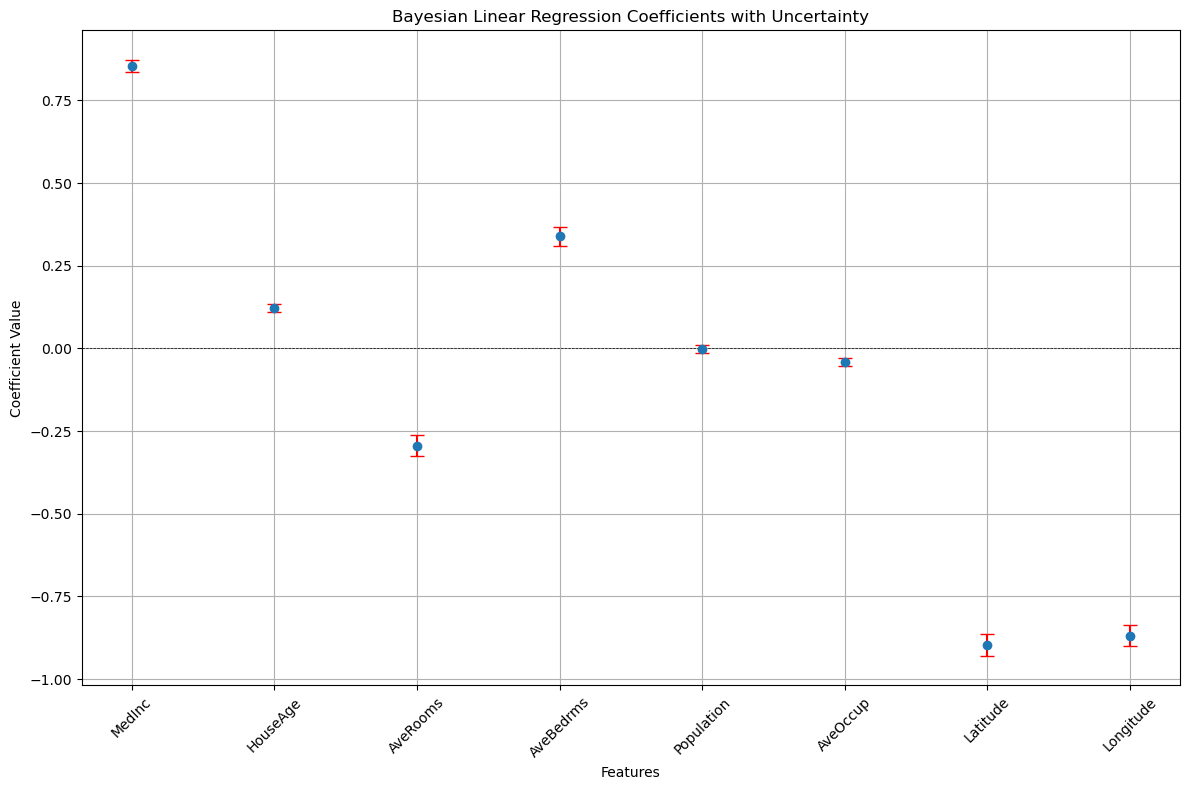

In [4]:
bayesian_model = BayesianRidge()
bayesian_model.fit(X_train_scaled, y_train)
y_pred_bayesian = bayesian_model.predict(X_test_scaled)


# Extract the standard deviation of the coefficients
std_dev_coef = np.sqrt(np.diag(bayesian_model.sigma_))

# Plotting
plt.figure(figsize=(12, 8))
plt.errorbar(range(len(bayesian_model.coef_)), bayesian_model.coef_,
             yerr=1.96*std_dev_coef, # To approximate the 95% confidence interval for the coefficients
             fmt='o', 
             ecolor='r', 
             capsize=5)
plt.xticks(range(len(bayesian_model.coef_)), data.feature_names, rotation=45)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Bayesian Linear Regression Coefficients with Uncertainty')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--') # Adds a line to denote zero on the y-axis
plt.grid(True) # Adds a grid for better readability
plt.tight_layout() # Adjusts plot to ensure everything fits without overlapping
plt.show()

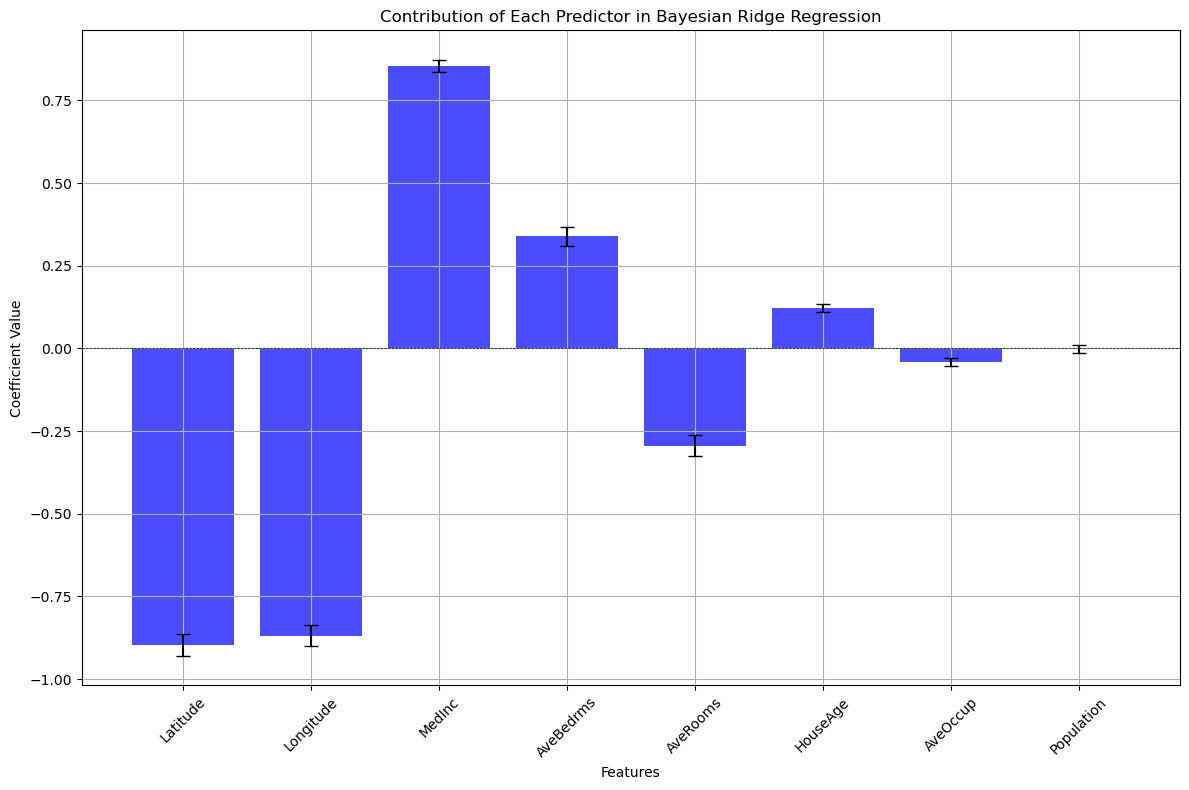

In [5]:
plt.figure(figsize=(12, 8))
coefs_with_errors = [(coef, error) for coef, error in zip(bayesian_model.coef_, 1.96*std_dev_coef)]

# Sort the coefficients with errors by the magnitude of the coefficient
coefs_with_errors_sorted = sorted(coefs_with_errors, key=lambda x: -np.abs(x[0]))

# Separate the coefficients and errors for plotting
sorted_coefs, sorted_errors = zip(*coefs_with_errors_sorted)
feature_names_sorted = [data.feature_names[i] for i in np.argsort(-np.abs(bayesian_model.coef_))]

# Creating the bar plot
plt.bar(range(len(sorted_coefs)), sorted_coefs, color='blue', yerr=sorted_errors, align='center', alpha=0.7, capsize=5)
plt.xticks(range(len(sorted_coefs)), feature_names_sorted, rotation=45)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Contribution of Each Predictor in Bayesian Ridge Regression')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()

As we can see from the above plots from the Bayesian Linear Regression with uncertainty, there are both positive and negative coefficients associated with the features. We also see some of them are more confident than others, but generally these are very small bands which indicates that our variables explain the relationships well. Overall we see that Median Income and geographical location has the largest impact on housing prices acording to this model. 

#### 4. Gaussian Process Regression
- Apply Gaussian Process Regression to the Xset.
- Visualize the prediction uncertainties.
- Discuss how the Gaussian Process handles uncertainty in predictions.

In [6]:
from sklearn.gaussian_process.kernels import Matern

kernel = Matern(length_scale=1.0, length_scale_bounds=(1e-1, 1.0), nu=1.5) # nu controls the smoothness of the function drawn from the Gaussian process.
gpr_model = GaussianProcessRegressor(kernel=kernel, random_state=42) # Gaussian Process Regression (GPR) as a non-parametric approach that can be used to solve regression problems. Especially useful for the California Housing dataset since our previous models indicate it is not linearly seperable. Also, GPR can be used to estimate the uncertainty of the predictions, which is useful for the California Housing dataset since we have a lot of outliers.

gpr_model.fit(X_train_scaled, y_train)
y_pred_gpr, std_dev_gpr = gpr_model.predict(X_test_scaled, return_std=True)

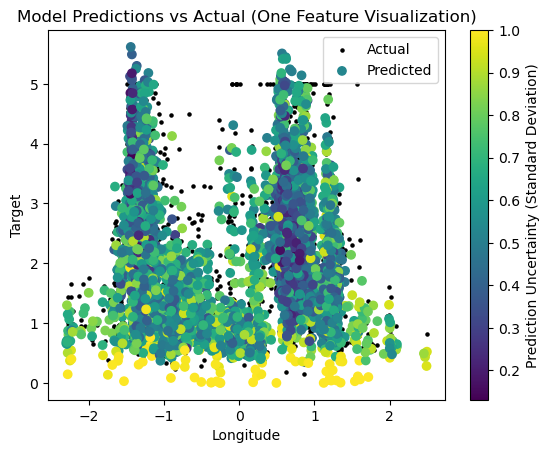

In [7]:
feature_index = 7
selected_feature = X_test_scaled[:, feature_index]

# Plot
plt.scatter(selected_feature, y_test, color='black', s = 5 ,label='Actual')

scatter = plt.scatter(selected_feature, y_pred_gpr,  c=std_dev_gpr, cmap='viridis', label='Predicted')
plt.colorbar(scatter, label='Prediction Uncertainty (Standard Deviation)')
plt.xlabel(data.feature_names[feature_index])
plt.ylabel('Target')
plt.title('Model Predictions vs Actual (One Feature Visualization)')
plt.legend()
plt.show()

From the above plot we can discern that for values close to 1, the model is rather uncertain about it's predictions. This could be caused by insufficient training data for this specific region or more specifically an outliers which are clustered around the same values.  

Values that are closer to 0 are predictions the model is more certain of - these regions has the inverse argument of the above. We have more training data, therefore the model performs increasingly well for these areas.  

There seems to be a specific pattern in the above plot -> clusters of data are more likely to be certain than where the clusters are small. Generally for negative values on the x axis we see a higher association on the y-axis for predictions the model is very certain about. For positive values on the x-axis, we see that the majority of certain predictions are clustered towards the lower middle part of the y-axis.  

Overall the Gaussian Process regression provides us with specific insight into each prediction of it's certainty or uncertainty. We are also able to form a specific structure over the data from this.  

A normal distribution with a mean and variance is what is produced when a GP regression is performed on a fresh input point. The variance offers a measure of uncertainty, whereas the mean forecasts the target's expected value. The larger the variance, the greater the uncertainty. 

In [22]:
# Performance measures RMSE and R^2 for Bayesian Ridge Regression and Gaussian Process Regression

bayesian_rmse = np.sqrt(mean_squared_error(y_test, y_pred_bayesian))
bayesian_r2 = r2_score(y_test, y_pred_bayesian)
gpr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_gpr))
gpr_r2 = r2_score(y_test, y_pred_gpr)

print(f"RMSE for Bayesian Ridge Regression: {bayesian_rmse:.4f}, R^2 for Bayesian Ridge Regression: {bayesian_r2:.4f}")
print(f"RMSE for Gaussian Process Regression: {gpr_rmse:.4f}, R^2 for Gaussian Process Regression: {gpr_r2:.4f}")

RMSE for Bayesian Ridge Regression: 0.7455, R^2 for Bayesian Ridge Regression: 0.5758
RMSE for Gaussian Process Regression: 0.6665, R^2 for Gaussian Process Regression: 0.6610


As we can see, the Gaussian Process regression outperforms the Bayesian Ridge Regression. GPR might be performing better for this dataset since it a non-parametric model that can capture non-linear complex patterns. As mentioned earlier, the linear kernel for KRR performed much worse than a regressor on the mean, meaning that the data is not linearly seperable. And it seems that the complexity and non-linearity of the data goes much deeper than first assumed, which can explain why the GPR outperforms the Bayesian Ridge as well. Since GPR takes a probabilistic approach and can account for noise, it might be less sensitive to outliers than BRR.

#### 5. Comparative Analysis
- Compare the results obtained from KRR, Bayesian Linear Regression, and Gaussian Process Regression.
    - Visualize the regression fit provided by each model and compare.
    - Use at least one of the metrics: MSE, RMSE, R2
- Evaluate and discuss the performance, computational efficiency, and ease of interpretation of each model.
    - For Bayesian Linear Regression, analyze the posterior distributions of the coefficients. For KRR, discuss the interpretability of the kernel.

Overall we have established that the California Housing Prices dataset consists of significant outliers. We have also confirmed our suspicion of the fact that the dataset is not linearly seperable. This is crucial information, since the models we impose later on in this part of the assigment, har non-linear models, both the RBF and Laplacian from KRR, but also Bayesian Linear Regression and Gaussian Process regresssors. The important thing to take away from this is that the revelation of the data not being linearly seperable is crucial when we are performing model predictions since it has a huge effect on both computation (since we might need to select more complex models that require more computation) but also on our predictions. 

# 2. Outlier detection
In this assignment, you can choose one of the below dataset and your task is to identify the outliers in them using various machine learning techniques.


## Dataset

You can choose One of the below datasets:
1. The dataset is a small sample from the Fashion MNIST dataset with manually added outliers. The data will be provided in the form of two numpy arrays: `images` and `labels`. (Note:check for missing data)
2. You will generate your data with outliers:
    * Use NumPy to create data points that follow a normal distribution. This forms the "normal" part of your dataset. 
    * Manually add data points that are significantly different from the normal data. 
    * These points should be distant from the mean of the normal data to be considered outliers.
    * Combine the normal data points and outliers into a single dataset.

### Objectives
1. Perform exploratory data analysis (EDA) to understand the dataset.
2. Implement PCA (Principal Component Analysis) for dimensionality reduction and visualize the results.
3. Use K-means clustering to identify potential outliers.
4. Apply t-SNE (t-Distributed Stochastic Neighbor Embedding) for visualization and detect anomalies.
5. (Optional) Design and train an autoencoder and use reconstruction error to find outliers.
6. Compare the effectiveness of the above methods in outlier detection.

## Tasks

#### 1. Exploratory Data Analysis (EDA)
- Load the dataset and visualize some images.
- Plot the distribution of the different classes in the dataset.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
import tensorflow as tf


data = np.load('fmnist_710.npz')
images, labels  = data['x'] , data['y']

In [10]:
train_images = images.astype('float32') / 255


# Flatten images
X = train_images.reshape((train_images.shape[0], -1))

X.shape

(1210, 784)

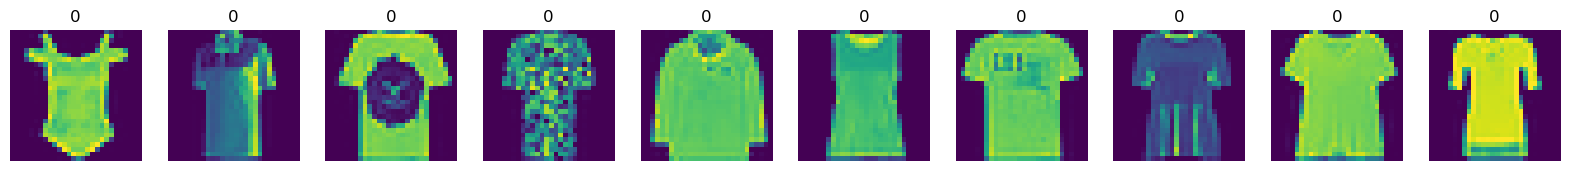

In [11]:
# Visualize some of the images from the dataset

fig, ax = plt.subplots(1, 10, figsize=(20, 20))
for i in range(10):
    ax[i].imshow(images[i])
    ax[i].set_title(labels[i])
    ax[i].axis('off')
plt.show()

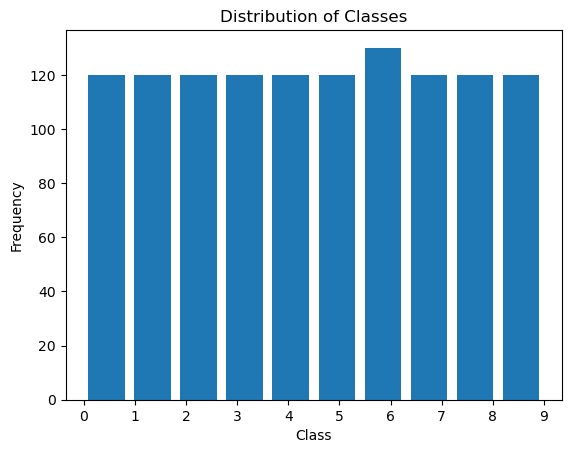

In [12]:
# Visualize all the classes in the dataset
plt.hist(labels, bins = 10, rwidth = 0.8)
plt.xticks(range(10))
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Classes')
plt.show()

#### 2. PCA for Dimensionality Reduction
- Implement PCA to reduce the dimensionality of the dataset.
- Visualize the data in the reduced dimension space.

Applying PCA is very convenient with the function PCA() from sklearn, which computes the covariance matrix, as well as the eigenvalues for the associated eigenvectors. Dimensionality reduction is particular useful when considering predictions for this kind of dataset, since we are able to reduce the complexity of the dataset while retaining the variance of the original predictors very effectively using the first methods mentioned in this chunk.  

In [13]:
# Apply PCA for Dimensionality Reduction and Outlier Detection
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
X_reconstructed = pca.inverse_transform(X_pca)
reconstruction_error_pca = np.sum((X - X_reconstructed) ** 2, axis=1)
outliers_pca = reconstruction_error_pca > np.percentile(reconstruction_error_pca, 95)

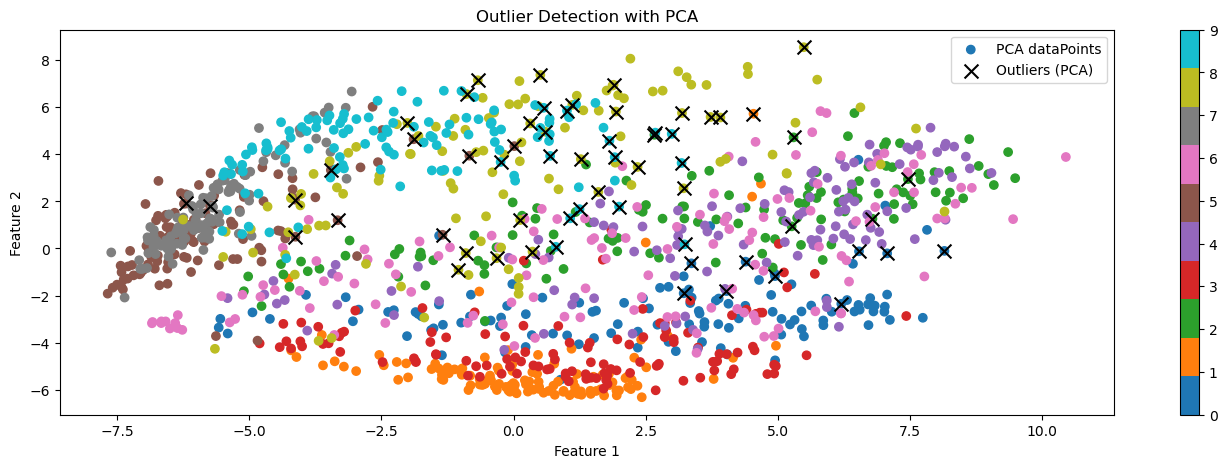

In [14]:
# Visualization
plt.figure(figsize=(17, 17))

# Visualization for PCA
plt.subplot(311)
p = plt.scatter(X_pca[:, 0], X_pca[:, 1],  c=labels, label='PCA dataPoints', cmap='tab10')
plt.scatter(X_pca[outliers_pca, 0], X_pca[outliers_pca, 1], c='k', marker='x', s=100,label='Outliers (PCA)')
plt.title('Outlier Detection with PCA')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
cbar = plt.colorbar(p, orientation='vertical' )
plt.legend()

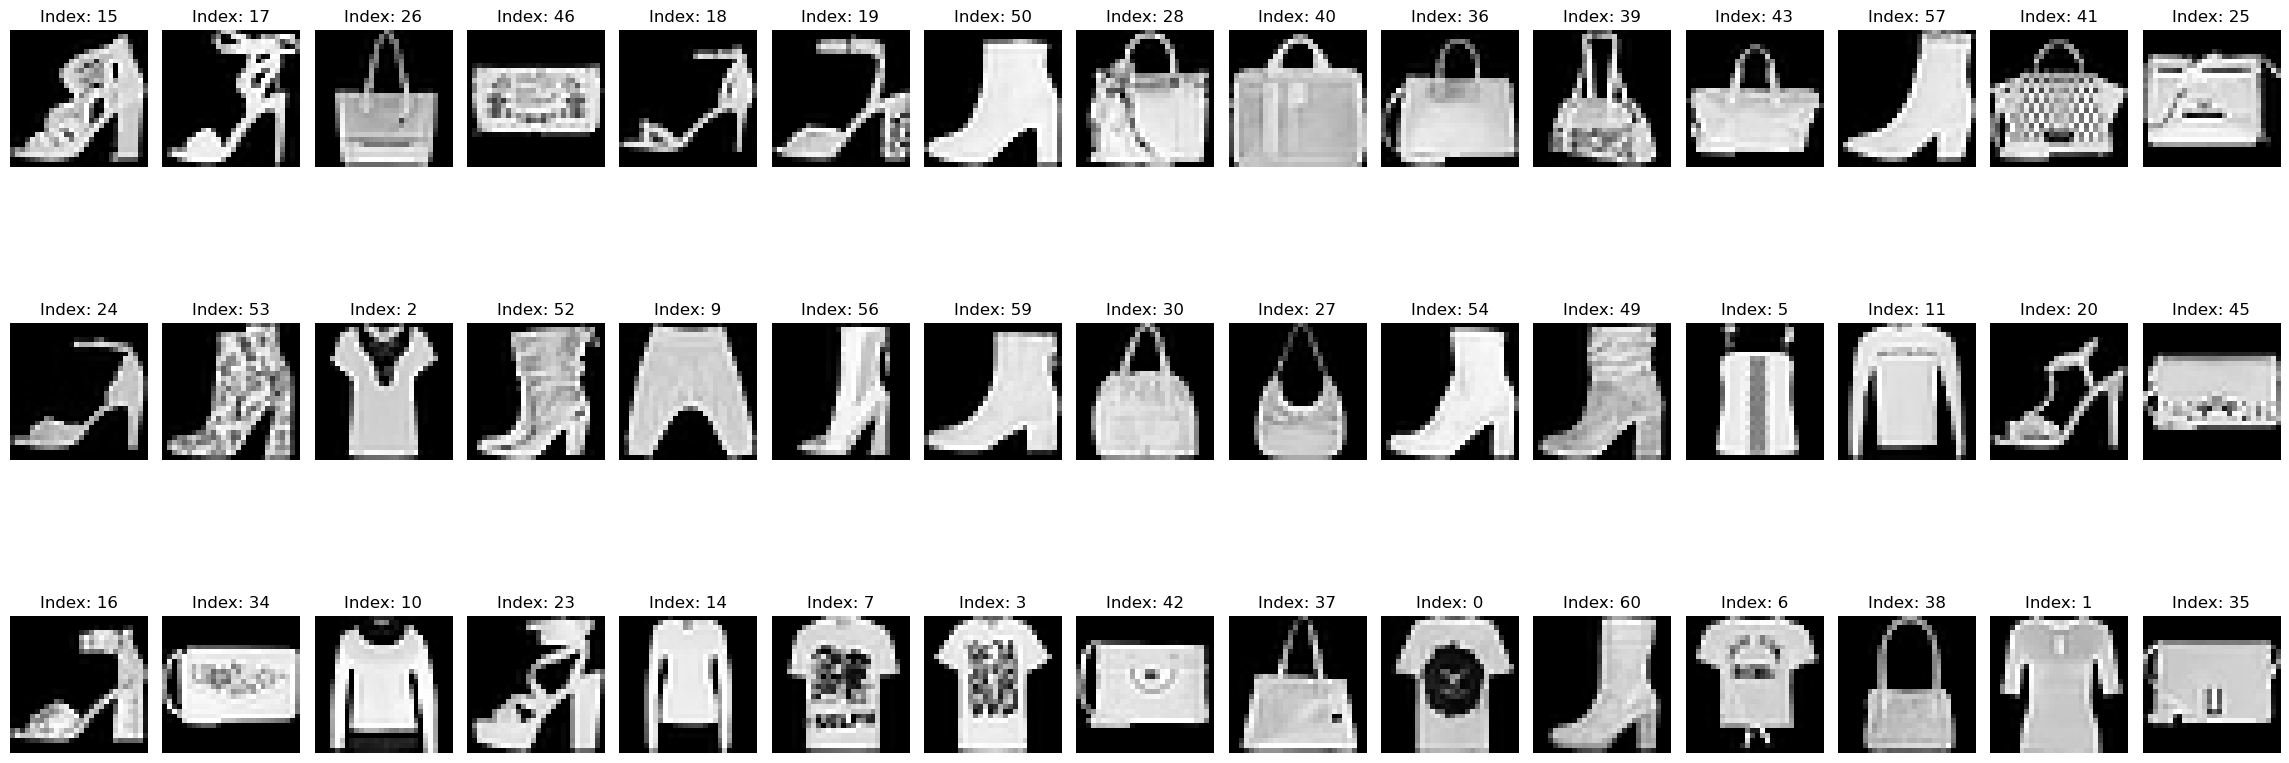

In [15]:
img = X[outliers_pca ]
indx = np.random.choice(range(img.shape[0]) , 45, replace =False)
plt.figure(figsize=(23, 10))
for i, idx in enumerate(indx):
    plt.subplot(3, 15, i + 1)
    plt.imshow(img[idx].reshape(28,28), cmap='gray')
    plt.title(f"Index: {idx}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [16]:
# No. of outliers
print(f"Number of outliers detected: {np.sum(outliers_pca)}")

Number of outliers detected: 61


As we can see from the plot using PCA, the method actually performed surprisingly well. The reason for suprisingly is that PCA is merely reduction of the dimensions and does not have any inherent capabilities of classying the data in specific clusters. What you would typically expect is that the clusters would be layered on top of each other. But this is not the case here, this might be the inherent structure of the data and not a particular axiom of the PCA method. There we will move on to other techniques, which inherently have structures that fit better for this type of problems.

#### 3. K-means Clustering
* K-means Clustering
    - Apply K-means clustering on the dataset.
    - Identify clusters that potentially contain outliers.

An unsupervised learning process called K-means clustering seeks to divide n observations into k clusters, each of which is assigned to the cluster with the closest centroid. The goal of the procedure is to reduce the squared Euclidean distances between the observation and the cluster centroid that it is a part of.  

/Users/asger/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


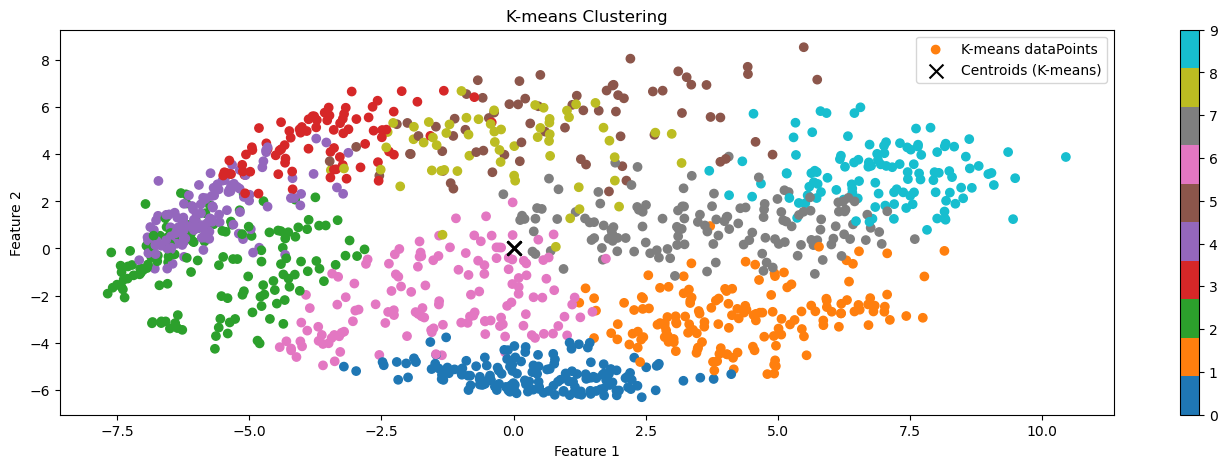

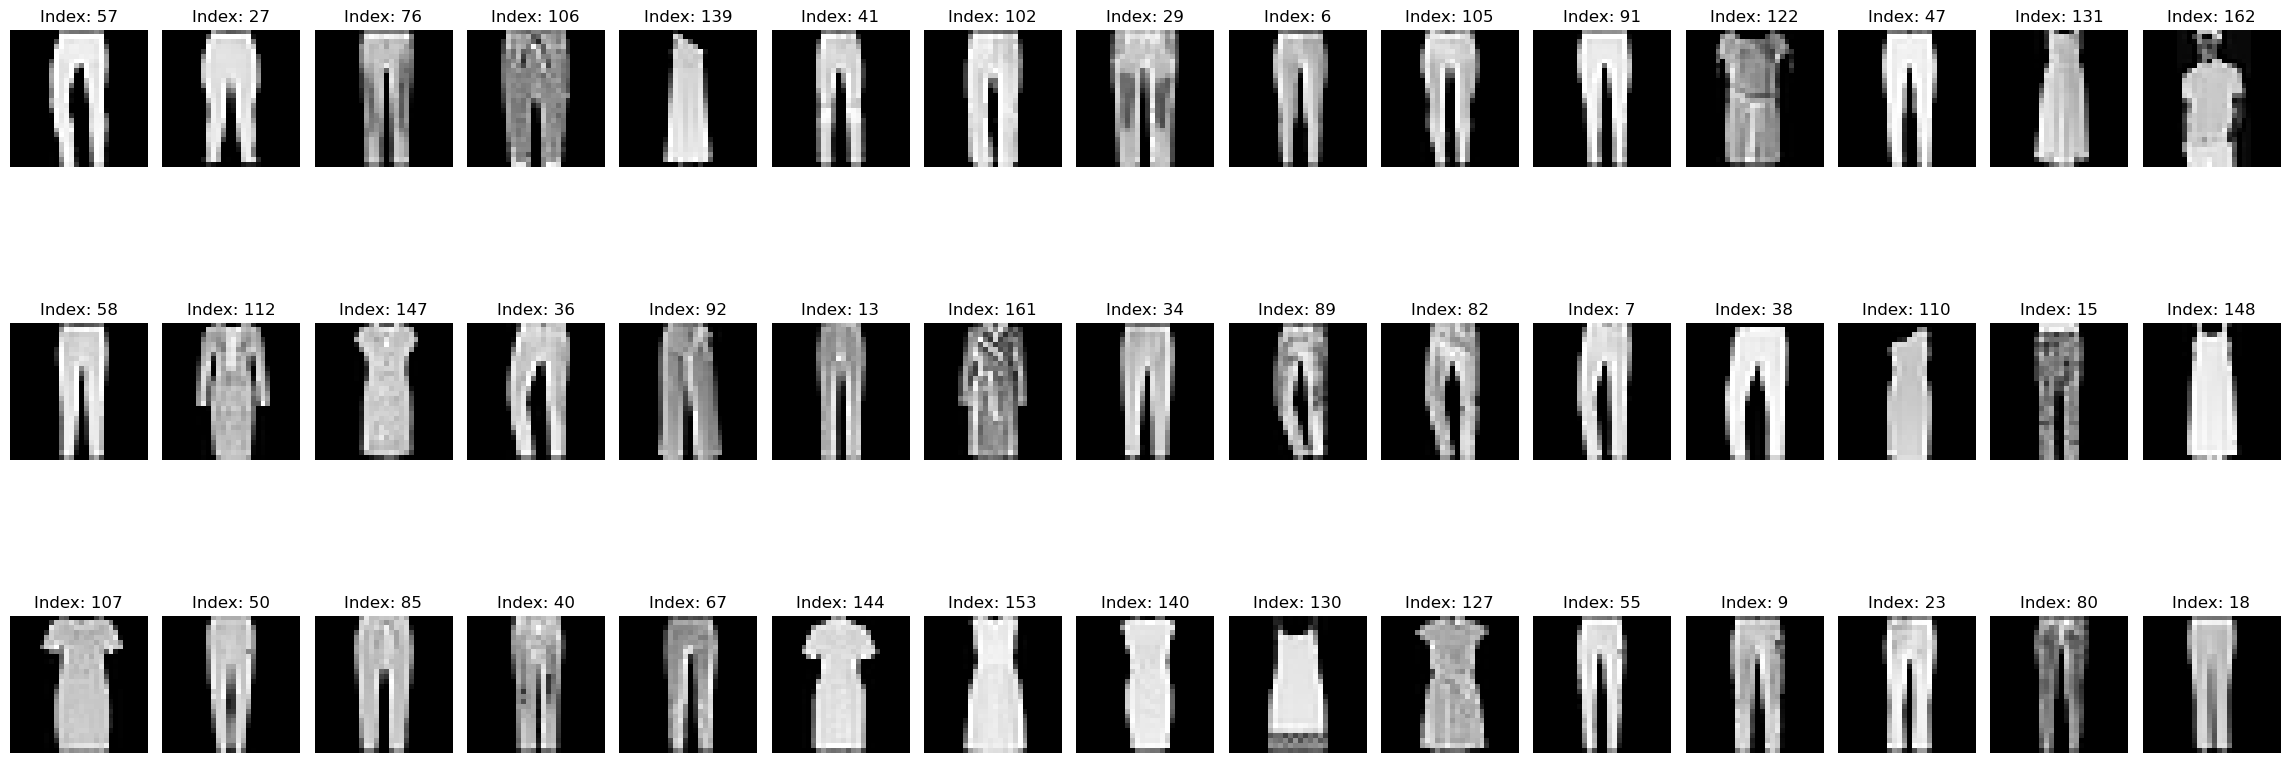

In [17]:
# Applying k-means clustering

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

# Visualization
plt.figure(figsize=(17, 17))

# Visualization for K-means
plt.subplot(311)
p = plt.scatter(X_pca[:, 0], X_pca[:, 1],  c=y_kmeans, label='K-means dataPoints', cmap='tab10')
plt.scatter(centers[:, 0], centers[:, 1], c='k', marker='x', s=100,label='Centroids (K-means)')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
cbar = plt.colorbar(p, orientation='vertical' )
plt.legend()

img = X[y_kmeans == 0]
indx = np.random.choice(range(img.shape[0]) , 45, replace =False)
plt.figure(figsize=(23, 10))
for i, idx in enumerate(indx):
    plt.subplot(3, 15, i + 1)
    plt.imshow(img[idx].reshape(28,28), cmap='gray')
    plt.title(f"Index: {idx}")
    plt.axis('off')
plt.tight_layout()
plt.show()

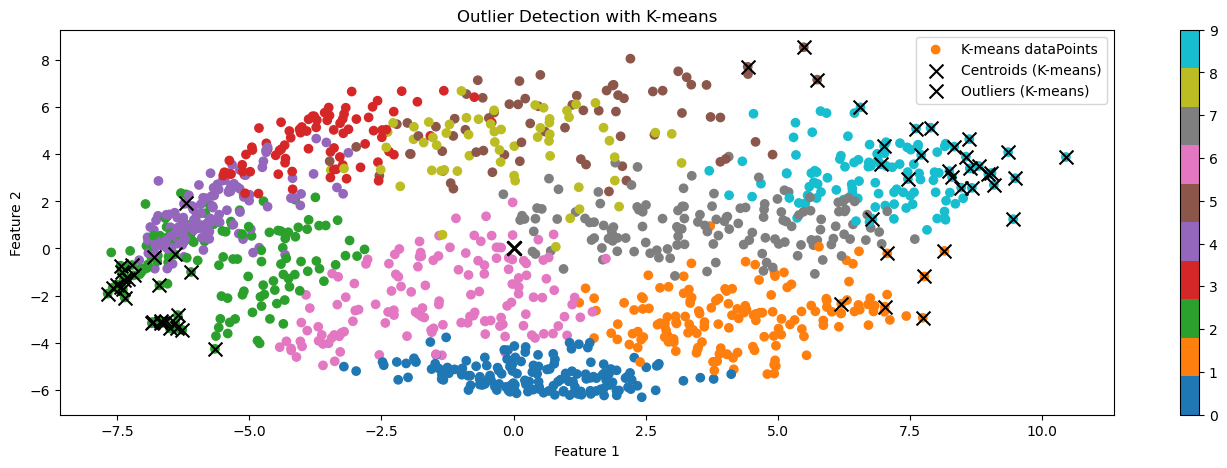

In [18]:
# Identify clusters which contain outliers

# Calculate the distance of each point to its nearest centroid

distances = cdist(X, centers, 'euclidean')
distances.shape

# Find the cluster with the largest distance to its centroid
largest_distance = np.max(distances, axis=1)
outliers_kmeans = largest_distance > np.percentile(largest_distance, 95)

# Visualization
plt.figure(figsize=(17, 17))

# Visualization for K-means
plt.subplot(311)
p = plt.scatter(X_pca[:, 0], X_pca[:, 1],  c=y_kmeans, label='K-means dataPoints', cmap='tab10')
plt.scatter(centers[:, 0], centers[:, 1], c='k', marker='x', s=100,label='Centroids (K-means)')
plt.scatter(X_pca[outliers_kmeans, 0], X_pca[outliers_kmeans, 1], c='k', marker='x', s=100,label='Outliers (K-means)')
plt.title('Outlier Detection with K-means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
cbar = plt.colorbar(p, orientation='vertical' )
plt.legend()
plt.show()

In [19]:
# Amount of outliers detected from k-means

print(f"Number of outliers detected: {np.sum(outliers_kmeans)}")

Number of outliers detected: 61


As the analysis from k-means clustering above have shown, we have an exact similar No. of outliers when using the method compared to PCA. One striking difference between these two is where the outliers are located. The dimensions for the two plots are similar, enabling us to perform a comparative analysis. When plotting the points between feature 1 and 2, we see that for PCA the outliers exits within the middle of the plot, towards zero. For k-means clustering we see that the outliers are diverging from this and are present at the outskirts of the plot. K-means clustering constructs a centroid which acts as the average of the clusters, this explains the reason for their presence at the leftmost points and rightmost points. 

#### 5. t-SNE for Visualization
- Apply t-SNE to the dataset and visualize the results.
- Discuss how t-SNE helps in identifying outliers.

One dimensionality reduction method that's frequently used for visualisation is t-SNE. This non-linear dimensionality reduction method works especially well for embedding high-dimensional data into a two- or three-dimensional space so that it can be shown graphically in a scatter plot. Because t-SNE is a stochastic technique, every time you run it, you will get a new set of results. This is as a result of its stochastic optimisation process and random initialization. This explains why every time we run the code, we get different results.

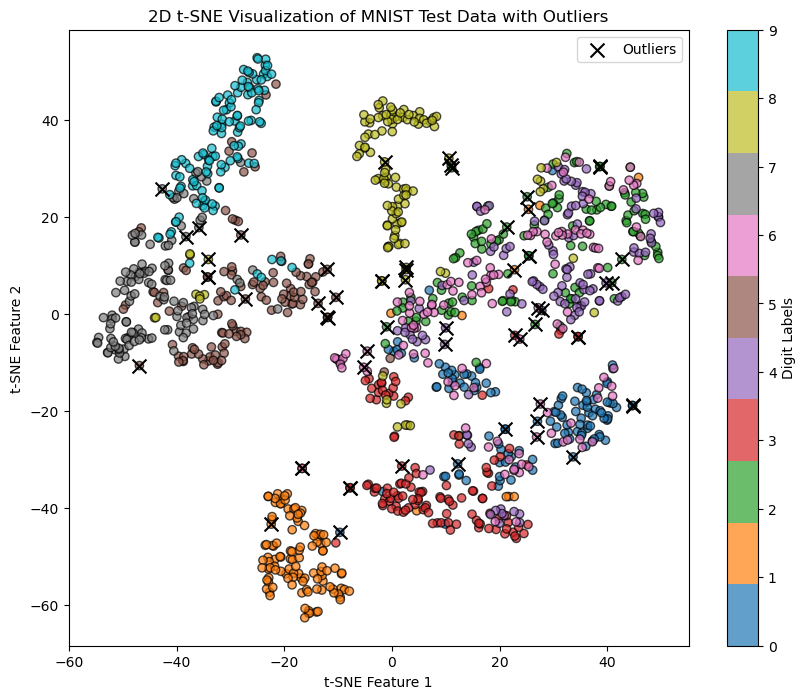

In [20]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, 
            perplexity=15,
            n_iter=1000, random_state=42)

X_tsne = tsne.fit_transform(X)  # Using a subset for quicker execution



# Outlier Detection: Calculate the distance from each point to its neighbors
distances = np.sqrt(((X_tsne[:, np.newaxis, :] - X_tsne[np.newaxis, :, :]) ** 2).sum(axis=2)) # computes the distance between each pair 
k_nearest_distances = np.sort(distances, axis=1)[:, 1:6]  # selects the distances to the five nearest points (excluding the distance to the point itself, which is zero).
outlier_scores = k_nearest_distances.mean(axis=1) #The mean distance to these nearest point
outliers = outlier_scores > np.percentile(outlier_scores, 95)  # Top 5% as outliers

# 2D Visualization of t-SNE results with Outliers
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels,
            cmap='tab10',
            edgecolor='k', alpha=0.7)
plt.scatter(X_tsne[outliers, 0], X_tsne[outliers, 1], c='k', marker='x', s=100, label='Outliers')
plt.title('2D t-SNE Visualization of MNIST Test Data with Outliers')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.colorbar(scatter, label='Digit Labels')
plt.legend()
plt.show()

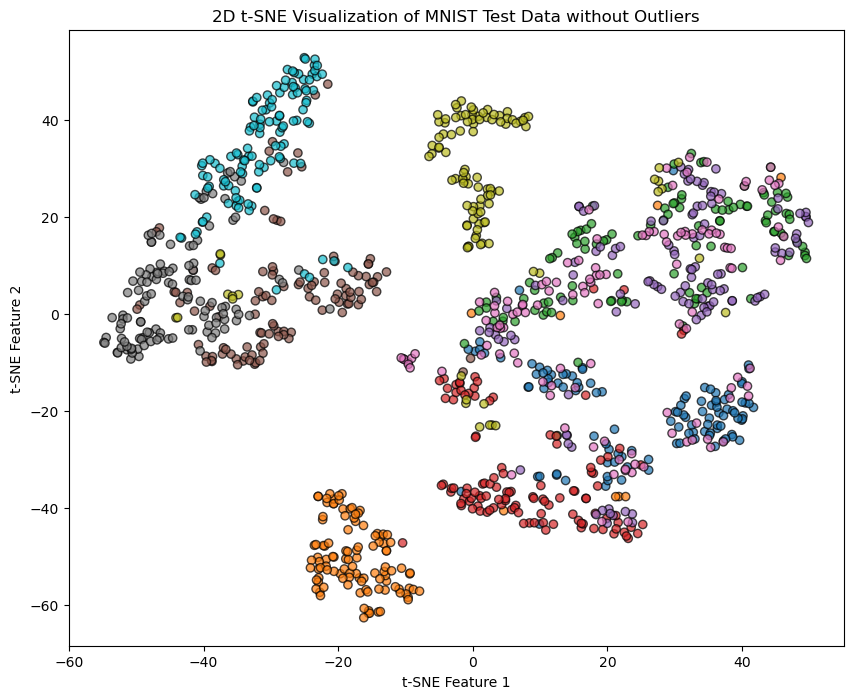

In [21]:

# 2D Visualization of t-SNE results without Outliers
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[~outliers, 0], X_tsne[~outliers, 1], c=labels[~outliers],
            cmap='tab10',
            edgecolor='k', alpha=0.7)
plt.title('2D t-SNE Visualization of MNIST Test Data without Outliers')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.colorbar(scatter, label='Digit Labels')
plt.show()

The plots shows discrete clusters that each correspond to a different colour, representing the 10 digit classes of the MNIST dataset. The cluster separation indicates that the intrinsic two-dimensional groups of the high-dimensional data have been effectively captured by t-SNE. A cluster where the intra-class variance is minimised and the inter-class variance is maximised seems to form around each digit in the reduced dimension space, suggesting that the classes are well separable.  

Although t-SNE is a great tool for visualising and locating clusters, it is not a cluster analysis technique per se and does not offer a numerical representation of cluster membership. The interpretation of the distances amongst clusters in t-SNE space is meaningless since t-SNE prioritises the preservation of local structure above global structure. In order for us to effectively analyze t-sne we need to have measures of reference from i.e. PCA and k-means clustering as already performed. 

#### 7. Comparative Analysis
- Compare the results of the models you chose to study.
- Discuss the effectiveness and limitations of each method in outlier detection.

As we have seen throughout this analysis of outlier detection, there are varying ways of performing this task. What, I believe to be the most important thing when performing these tasks and in general for the machine learning techniques are that there is no universal model we can impose on a dataset. It is absolutely crucial we inspect the quality and structure of the data before settling on a model. This is both the case for detecting anomalies in our data as we have done in the latter part of the assignment, but also when performing regression tasks. Models are inherently distinct, which enables them to be hyper specific for a given purpose.  

For this part of the assignment we've seen that techniques such as PCA, actually performed very well on the dataset at hand, whether or not this is given by the inherent structure of the data and not a "feature" of the theory for this model is still uncertain in my opinion, but none other than the less it was rather succesful at the task.    

We've seen that k-means clustering is a very straightforward technique, one which we can build upon and also potentially construct spherical clusters which can capture much more complex patterns in the data.  

Finally we've seen a specific technique, which has not perplexion of the data and it's values at hand, but rather yields a representation of the data which can help with interpretation in a stochastic environment. 